# 数据扩充算法  2020年2月2日


## 预备知识
### 在Pytorch中，提供的torchvision主要使用PIL的Image类进行处理，所以它数据增强函数大多数都是以PIL作为输入，并且以PIL作为输出。因此，第一件事应该是将自己的图片读取为PIL.Image类对象：

In [1]:
def read_PIL(image_path):
    """ read image in specific path 
    and return PIL.Image instance"""
    image = Image.open(image_path)
    return image

### 取PIL库是因为这是python的原生库，兼容性比较强

## 一、常规的数据扩充方法

### 1、随机水平翻转：随机水平翻转意思是有一半的可能性翻转，也有一半的可能性不翻转。使用的是transforms.RandomHorizontalFlip()类：

In [32]:
from PIL import Image
img=read_PIL('C:\Opencv\Ayasa.jpg')

C:\Users\LWQ\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [33]:
def horizontal_flip(image):
    HF = transforms.RandomHorizontalFlip()
    hf_image = HF(image)
    return hf_image

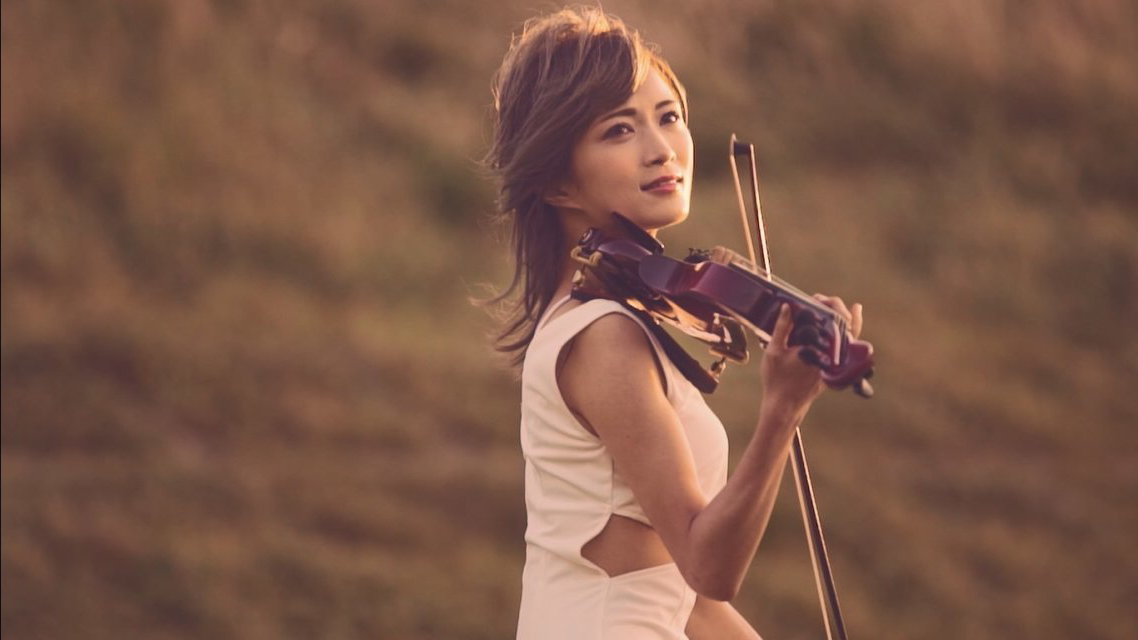

In [35]:
hfed_img=horizontal_flip(img)
hfed_img

### 2、中心裁剪：中心裁剪的目的是从图片的中心开始，裁剪出其四周指定长度和宽度的图片，也就是获取原图的中心部分，核心类是transforms.CenterCrop(size)，其中size参数是表示我们希望裁剪的尺寸的大小：

In [12]:
def center_crop(image):
    Center_Crop=transforms.CenterCrop(size=(200,200))
    cropped_img=Center_Crop(image)
    return cropped_img

In [14]:
from torchvision import datasets
from torchvision import transforms
copped_immg=center_crop(img)

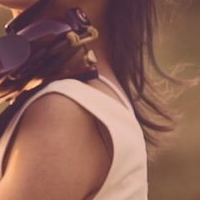

In [16]:
copped_immg

### 3、随机裁剪：随机裁剪和中心裁剪是有区别的，中心裁剪需要围绕图片中心点进行，但是随机裁剪的结果来自图片的哪个部分是随机的。所使用的核心函数为transforms.RandomCrop(size)，其中size表示自己希望获得裁剪后图片的尺寸：

In [17]:
def random_crop(image):
    RandomCrop = transforms.RandomCrop(size=(200, 200))
    random_image = RandomCrop(image)
    return random_image 

In [18]:
radnommed_img = random_crop(img)

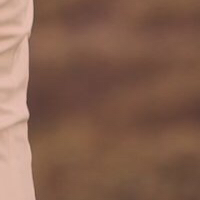

In [19]:
radnommed_img

### 4、Resize缩放图像：图像的resize是最为常见的操作，尤其是当手中数据尺寸和网络结构不匹配时，比如网络只有3个池化层的进行降低特征图尺寸，但是手里的数据为1024x1024时，就需要降低图像的长和宽。核心函数为Resize = transforms.Resize(size)，其中size依旧表示目标图像尺寸：

In [20]:
def resize(image):
    Resize = transforms.Resize(size=(100, 50))
    resized_image = Resize(image)
    return resized_image

In [21]:
resized_img=resize(img)

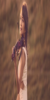

In [22]:
resized_img

### 5、随机长宽比裁剪：随机长宽比裁剪的实现借助于transforms.RandomResizedCrop类，可以看出这个功能是Resize和Crop的随机组合，这在Inception网络的训练中比较有用。这个类的初始化包含3个参数（size， scale， ratio），size参数为目标图片的尺寸，其中scale参数代表输出图片占原始图片的百分比区间，ratio表示长宽比的取值区间，随机的意思就是在这两个区间中随机选取两个参数值：

In [23]:
def random_resized_crop(image):
    RSC = transforms.RandomResizedCrop(size=200, scale=(0.2, 0.5), ratio=(1, 5))
    rsc_image = RSC(image)
    return rsc_image

In [24]:
rrced_img=random_resized_crop(img)

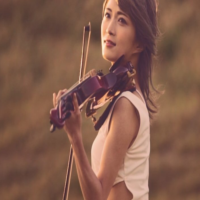

In [25]:
rrced_img

### 6、随机垂直翻转：随机垂直翻转和上面的随机水平翻转原理相同，只不过是在垂直方向上进行，使用的类为transforms.RandomVerticalFlip()：

In [36]:
def vertical_flip(image):
    VF = transforms.RandomVerticalFlip()
    vf_image = VF(image)
    return vf_image

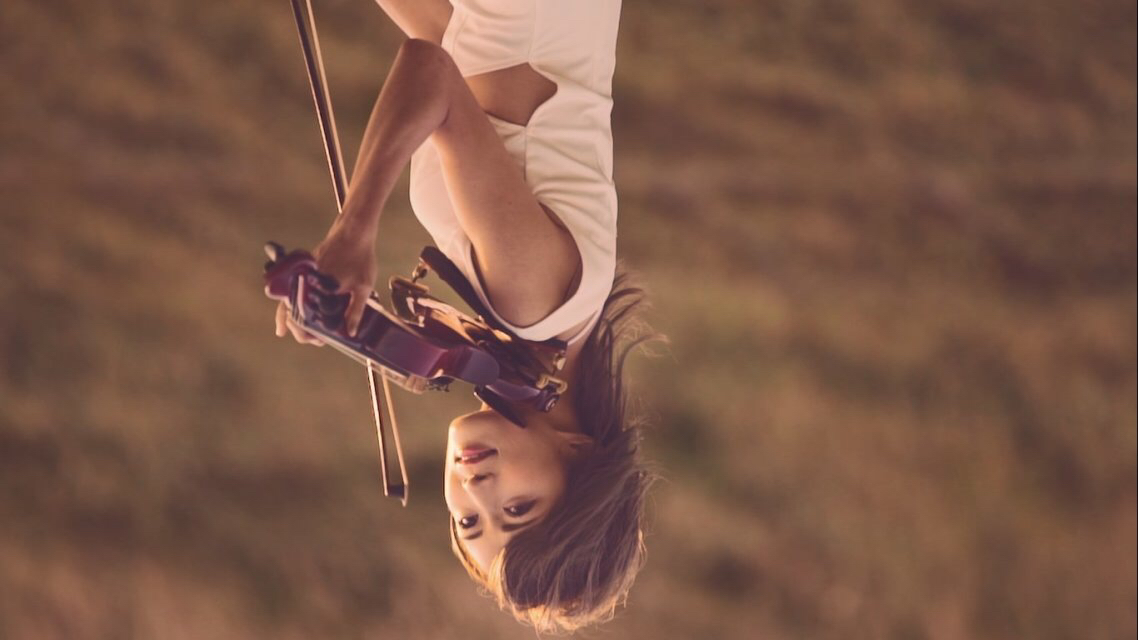

In [41]:
vfed_img=vertical_flip(img)
vfed_img

### 7、随机旋转：随机旋转仍然是图像像素位置变换的一种常用操作，我们可以设定自己希望旋转的角度区间，transforms.RandomRotation(degrees)中的degrees参数表示旋转角度的选择范围：

In [42]:
def random_rotation(image):
    RR = transforms.RandomRotation(degrees=(10, 80))
    rr_image = RR(image)
    return rr_image

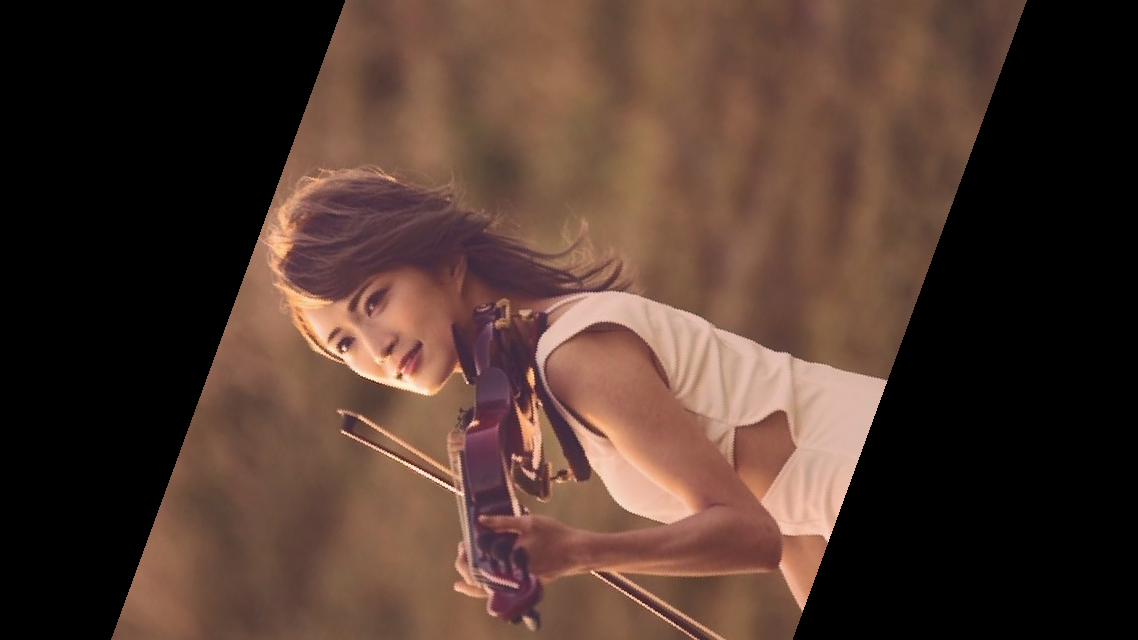

In [43]:
rred_img=random_rotation(img)
rred_img

## 阶段总结：
## 三个环节：Image读入图像、实现Transform的方法、应用该方法到图像中。实现方法中，定义函数、应用输入到函数。

## 二、特殊的数据扩充方法

### 1、Fancy PCA方法
### 通常图像具有RGB三个通道，例如一张256 * 256的彩色图像具有(256, 256, 3)的尺寸，每一个通道形成一组数据，将图像尺寸改成((256*256), 3)，进而将图像转换成一个三维向量。然后对其执行PCA，得到一个3 * 3的协方差矩阵，通过该矩阵求得特征值与特征向量，特征值与特征向量按从大到小的顺序进行排序。计算公式如下：